In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plot

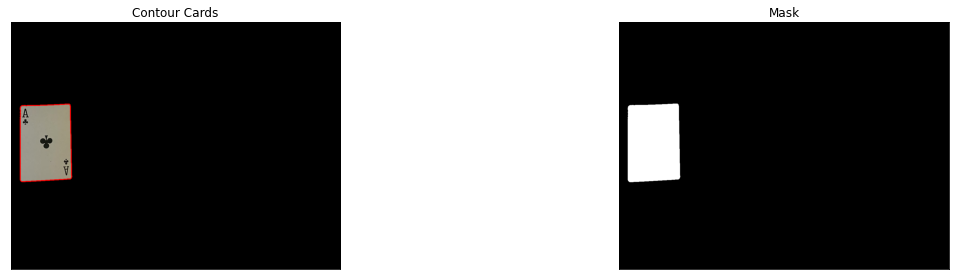

In [2]:
img = cv2.imread("blackcard1.jpg")
G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T = 120
T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
#inverse = cv2.bitwise_not(B)
C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
C = sorted(C, key=cv2.contourArea, reverse=True)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cropped = img  
croppedH, croppedW, croppedChannels = cropped.shape 
croppedBlack = np.zeros((croppedH,croppedW,3), np.uint8)
cv2.fillPoly(croppedBlack, pts =[(C[0])], color=(255,255,255))

G = cv2.cvtColor(croppedBlack, cv2.COLOR_BGR2GRAY)
T = 50
T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

B=cv2.cvtColor(B,cv2.COLOR_GRAY2BGR)#change mask to a 3 channel image 
mask_out=cv2.subtract(B,img)
mask_out=cv2.subtract(B,mask_out)

plot.figure(2, figsize=(20,10)) #plots each clicked cell beside the isolated version so it can be looked back over
chosenCell = plot.subplot(221)
chosenCell.set_title("Contour Cards")
plot.imshow(mask_out, cmap='gray'), plot.xticks([]),plot.yticks([])

isolated = plot.subplot(222)
isolated.set_title("Mask")
plot.imshow(B, cmap='gray'), plot.xticks([]),plot.yticks([])
plot.show()